<a href="https://colab.research.google.com/github/OsvaldoSan/TSC/blob/master/Practica_Boston_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [2]:
data = load_boston()
df_features = pd.DataFrame(data.data,columns=data.feature_names)
df_target = data.target

# Tratamiento de los datos

## Escalamiento de los datos

In [3]:
scaler = StandardScaler()
scaler.fit(df_features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
Xs = pd.DataFrame(scaler.transform(df_features))

In [5]:
scalery = StandardScaler()
scalery.fit(pd.DataFrame(df_target))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
ys = pd.DataFrame(scalery.transform(pd.DataFrame(df_target)),columns=['Price'])

In [7]:
ys.head(2)

,Price
0,0.159686
1,-0.101524


# Construcción del modelo

In [8]:
Xst,Xsv,yst,ysv = train_test_split(Xs,ys)

In [33]:
def build_model():
  model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(Xst.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [34]:
model = build_model()

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Prueba del modelo
example_batch = Xst[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.078633  ],
       [-0.55614066],
       [-0.11635654],
       [-0.38173744],
       [-0.47276253],
       [-0.46442467],
       [-0.17230694],
       [-0.09928688],
       [-0.05312878],
       [-0.0783048 ]], dtype=float32)

In [36]:
EPOCHS = 100

history = model.fit(
  Xst, yst,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

# Validación de los resultados

In [37]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,0.024304,0.119266,0.024304,0.239814,0.312036,0.239814,95
96,0.017082,0.092976,0.017082,0.239224,0.328440,0.239224,96
97,0.017360,0.094882,0.017360,0.259371,0.318580,0.259371,97
98,0.023981,0.116567,0.023981,0.243963,0.311220,0.243963,98
99,0.016414,0.094021,0.016414,0.267823,0.320363,0.267823,99


In [38]:
loss, mae, mse = model.evaluate(Xsv, ysv, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

4/4 - 0s - loss: 0.0997 - mae: 0.2308 - mse: 0.0997
Testing set Mean Abs Error:  0.23 MPG


In [17]:
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

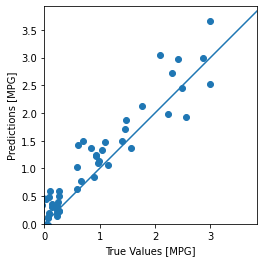

In [42]:
test_predictions = model.predict(Xsv).flatten()

plt.scatter(ysv, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

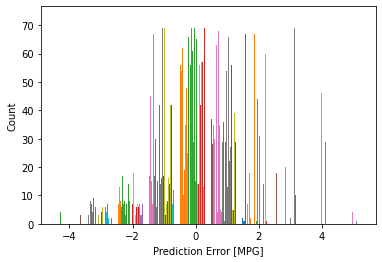

In [49]:
error = test_predictions - np.array(ysv)
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")
